## Toy example: kicking a ball

Kick a ball with initial velocity $V = (V_x, V_y)^T$ at angle $\theta$.

\begin{align*}
x'(t) &= V_{x} = \sin(\theta) V \\
y'(t) &= V_{y} = \cos(\theta) V - \int_{0}^t g \, dt = \cos(\theta) V - gt
\end{align*}

In [33]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 30 # m/s initial speed
theta0 = np.deg2rad(40) # initial angle (converted to radians)
g = 9.81 # m/s^2

vx0 = np.sin(theta0)*v0
vy0 = np.cos(theta0)*v0

t0 = 0
T = 5
N = 100
dt = (T - t0)/N

ts = np.linspace(t0, T, N, endpoint=True)

xs = np.zeros(N)
ys = np.zeros(N)



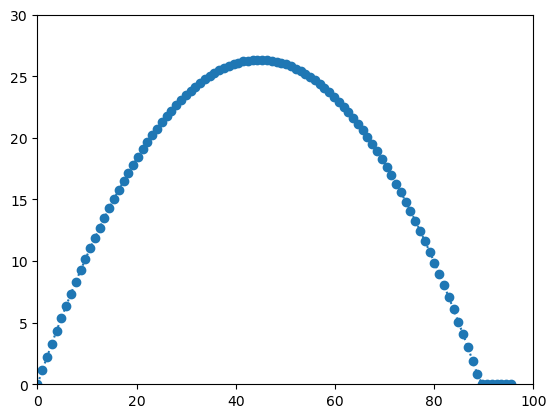

In [58]:
x = xs[0]
vx = vx0
y = ys[0]
vy = vy0
for i in range(1,N):
    # Update x
    vx = vx # Constant speed
    x += vx*dt
    xs[i] = x

    # Update y
    vy = vy - g*dt # Just gravity
    y += vy*dt
    ys[i] = np.maximum(y,0) # Stop ball from sinking below ground

plt.plot(xs,ys,':o')
plt.ylim((0, 30))
plt.xlim((0, 100));


## Let's add wind resistance

Assume it is $\sim v(t)^3$.

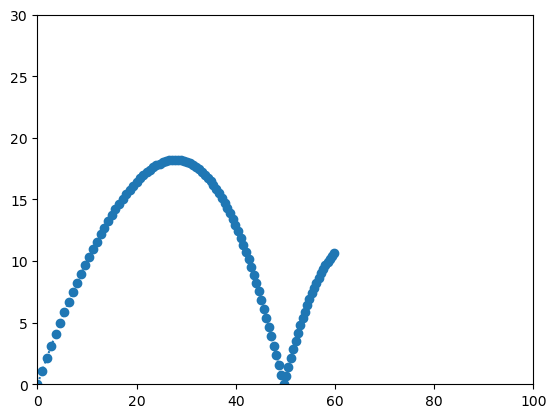

In [59]:
wr = 0.001 # Wind resistance

xs = np.zeros(N)
ys = np.zeros(N)

x = xs[0]
vx = vx0
y = ys[0]
vy = vy0
for i in range(1,N):
    # Update x
    vx = vx - dt*wr*vx**3 # Wind resistance
    x += vx*dt
    xs[i] = x

    # Update y
    vy = vy - g*dt - dt*wr*vy**3 # Gravity and wind resistance
    y += vy*dt
    ys[i] = np.maximum(y,0) # Stop ball from sinking below ground
    if y < 0:
        vy = -vy # Bounce

plt.plot(xs,ys,':o')
plt.ylim((0, 30))
plt.xlim((0, 100));

### Let's repeat the experiment on a small asteroid (without athmosphere)

Graviational pull: $\sim -G \frac{m_1 m_2}{r^2}$.

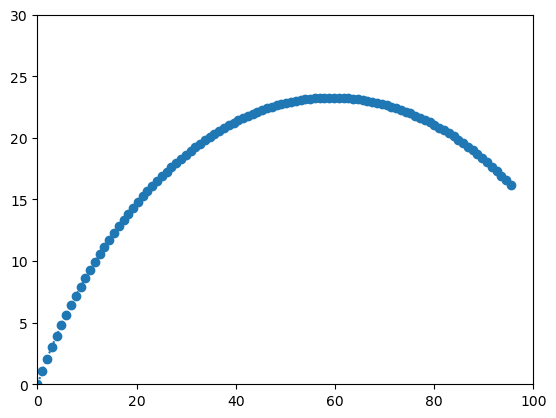

In [64]:
wr = 0.0 # Wind resistance
R = 13 # Asteroid radius
Gmm = 5000 # Magic number

xs = np.zeros(N)
ys = np.zeros(N)

x = xs[0]
vx = vx0
y = ys[0]
vy = vy0
for i in range(1,N):
    # Update x
    vx = vx - dt*wr*vx**3
    x += vx*dt
    xs[i] = x

    # Update y
    vy = vy - dt*Gmm/(y + R)**2 - dt*wr*vy**3 # Gravity and wind resistance
    y += vy*dt
    ys[i] = np.maximum(y,0) # Stop ball from sinking below ground
    if y < 0:
        vy = -vy # Bounce

plt.plot(xs,ys,':o')
plt.ylim((0, 30))
plt.xlim((0, 100));